# Visualize the decoded location of representative mice

In [5]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

os.chdir("/work")
from param import *
from modules.dataloader import SpikesCoordDataset

output_dir = ParamDir().OUTPUT_DIR
datalist = ParamDir().data_path_list


## One dim visulization

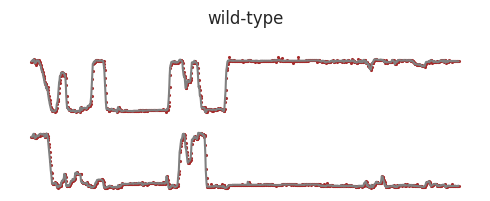

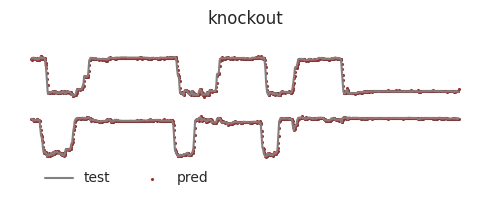

In [48]:
conf_level = .01
for m_id, data_dir in enumerate(datalist[[2,0]]):
    fig, axes = plt.subplots(nrows = 2, sharey='row', figsize=(5,2),tight_layout = True)
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    for result in eval_results_all:
        if result["coord_axis"] == "x-axis" and result["nthist"] == 1:
            # coordinate
            axes[0].plot(result["y_test"]/5, c = "gray", label="test")
            axes[0].scatter(np.arange(len(result["y_pred"])),result["y_pred"]/5, c = "brown", label="pred", s=1.5)
            axes[0].axis('off')

        if result["coord_axis"] == "y-axis" and result["nthist"] == 1:
            # coordinate
            axes[1].plot(result["y_test"]/5, c = "gray", label="test")
            axes[1].scatter(np.arange(len(result["y_pred"])),result["y_pred"]/5, c = "brown", label="pred", s=1.5)
            axes[1].axis('off')
    plt.suptitle(mouse_type)
plt.legend(bbox_to_anchor=(.45, 0), ncol=3)

## Two dim visualization

In [2]:
def get_time(ind, result):
    X, _ = SpikesCoordDataset(data_dir).load_all_data(result["coord_axis"], result["nthist"])
    train_bins = int(len(X) * ParamTrain().train_size )
    return round(int(train_bins+ind)/3, 1)


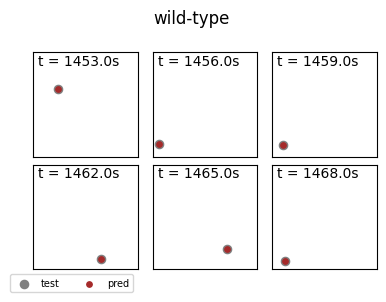

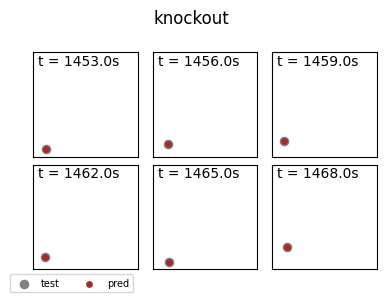

In [116]:

for m_id, data_dir in enumerate(datalist[[2,0]]):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(4,3),tight_layout = True)
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    x_results = [result for result in eval_results_all if (result["nthist"] == 1)and(result["coord_axis"] == "x-axis")][0]
    y_results = [result for result in eval_results_all if (result["nthist"] == 1)and(result["coord_axis"] == "y-axis")][0]

    for id_, ax in enumerate(axes.ravel()):
        ind = id_*9 + 45
        ax.scatter(x_results["y_test"][ind]/5, y_results["y_test"][ind]/5, c="gray", label="test", s=35)
        ax.scatter(x_results["y_test"][ind]/5, y_results["y_test"][ind]/5, c="brown", label="pred", s=15)
        ax.text(2,35, f"t = {get_time(ind, x_results)}s")
        ax.set_xlim(0,40)
        ax.set_ylim(0,40)
        ax.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

        ax.set_aspect('equal')
    axes[1][0].legend(ncol=2,bbox_to_anchor=(1, 0), prop={'size': 7})
    plt.suptitle(mouse_type)